<a href="https://colab.research.google.com/github/sandeepshrigondekar/TrafficLightDetection/blob/main/TLDv23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
# List the content of the local computer folder 
!ls -la "/content/gdrive/My Drive/"

total 150820
-rw------- 1 root root      6918 Aug 24  2014  210814EC02008317.pdf
-rw------- 1 root root    265568 Nov 19 17:53  Automation.pptx
drwx------ 2 root root      4096 Jan  2 12:46  Bosch_Dataset
-rw------- 1 root root     91081 Oct 11  2014  CAS_31082014_32371670.pdf
drwx------ 2 root root      4096 Jan 27  2020 'Colab Notebooks'
-rw------- 1 root root 150828752 Jun 21  2020  creditcard.csv
-rw------- 1 root root   3177781 Jul 14 05:51  Docs.zip
-rw------- 1 root root     18723 Sep  6  2014 'ELITE I20.XLS'
-rw------- 1 root root       151 Mar  7  2010 'General Information all tours[1].gdoc'
-rw------- 1 root root     19670 Dec 15 03:46  GYM-Data.xlsx
drwx------ 2 root root      4096 Jul 28  2019  IITB-DS-ML
drwx------ 2 root root      4096 Jan  2 12:46  .ipynb_checkpoints
drwx------ 2 root root      4096 Sep  1 22:56  LJMU-MS
drwx------ 2 root root      4096 Sep  1 22:59  Personal
drwx------ 2 root root      4096 Jan  4 11:27  TLD


In [3]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


# **Setup Darknet and check if its working**

In [4]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet
make: Nothing to be done for 'all'.


In [5]:
# !wget https://pjreddie.com/media/files/yolov3.weights

In [6]:
#Makes a dir for darknet
%cd /content/gdrive/My\ Drive/TLD
%mkdir darknet

/content/gdrive/My Drive/TLD
mkdir: cannot create directory ‘darknet’: File exists


In [7]:
# * The first time we will:
#   * Clone and compile the darknet project.
#   * Copy the compiled version to our Google Drive Folder
# * The next times, instead of compiling it again on every runtime load, we'll copy the compiled version
# Copy the Darknet compiled version to Google drive
!cp -r /content/darknet /content/gdrive/My\ Drive/TLD/

In [8]:
%cd /content/gdrive/My\ Drive/TLD/darknet/
# !cp /content/gdrive/My\ Drive/TLD/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/gdrive/My Drive/TLD/darknet


In [9]:
## Some Utils
# These utils are:
# * imgShow() - Will help us to show an image in the remote VM
# * download() - Will allow you to get some file from your notebook in case you need to
# * upload() - You can upload files to your current folder on the remote VM.
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

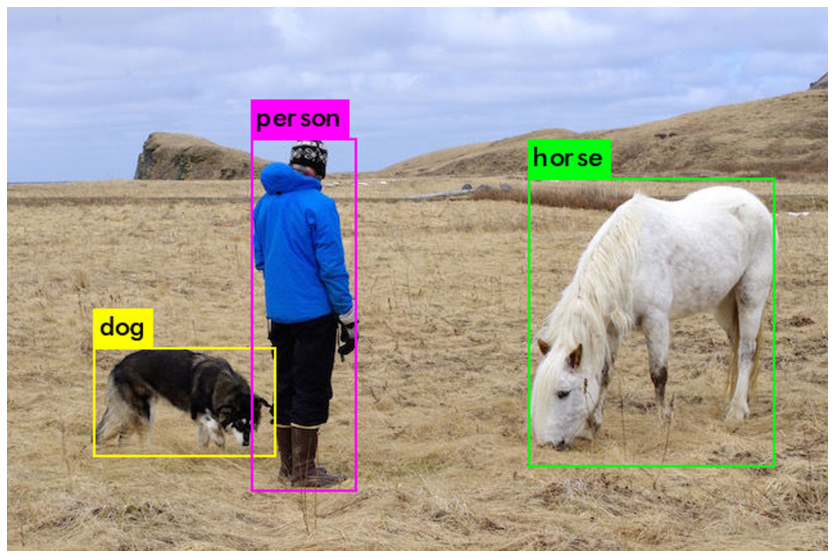

In [10]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [11]:
# Every time we want to run all tje cells automatically Go to the > Menu > Runtime > Run all. Sometimes may be we don't want to execute the entire notebook. 
# We  can write the following cell where we want to stop the process and uncoment the assert False command. This will throw an error and will stop to run more cells.
# Don't go beyond here with **Run All**
# assert False

# Setup environment for **Traffic Light Detection(TLD) and Classification**

Start of TLD Environment Setup and the steps to be followed are as given below -
1.   Dataset to be used is [Bosch Small Traffic Light Dataset](https://hci.iwr.uni-heidelberg.de/content/bosch-small-traffic-lights-dataset)
2.   Download all the training .rgb files and Use 7-zip utility to extract/unzip.
1.  Ensure to download all the training files before extracting.Details for extracting is given [here](https://hiro.bsd.uchicago.edu/node/3168)
2.   Unzip the images
1. Create 2 new folders in your mounted drive and give it a name as per your choice. Here we use names as <b>Bosch_Dataset</b> and <b>TLD</b>
1.  Create 2 folders **traffic_light_images_train** and **traffic_light_images_test**
under the above created folder
1.   Copy or Move all the images from different folders to the above single folder to make it easy to manipulate
1.   There are utility scripts that are used to convert data,xmls,labels amd images as per requirement of YOLO.These scripts are stored in **traffic_lights** folder.Instructions and information about these utility scripts is given in the notebook below inside the code cell.
2.   Download weights to run YOLO from [here](https://pjreddie.com/media/files/yolov3.weights) and save it into the darknet folder.
1.   Download the yolov3 imagenet darknet53 weights from [here](https://pjreddie.com/media/files/darknet53.conv.74) and save it into the darknet folder.






***Note : These setup instructions need to be executed only once and at the begining.***

In [12]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb

In [13]:
#%mkdir traffic_light_images_train

In [14]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb

In [15]:
#%mkdir traffic_light_images_test

In [16]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/rgb/train/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/

In [17]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/rgb/test/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test/

In [18]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train 
#!ls | wc -l

In [19]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test
#!ls | wc -l

In [20]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb
#%mkdir traffic_light_xmls_train

In [21]:
# %cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb
# %mkdir traffic_light_labels_train

In [22]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/
#%mkdir traffic_light_xmls_test

In [23]:
# Bosch Small Traffic Lights Dataset is coming with a Python script which turns the dataset into Pascal-VOC like dataset. 
# YOLO has a script for converting VOC dataset to YOLO styled input. 
# First clone the repository into the extracted dataset folder
# !git clone https://github.com/bosch-ros-pkg/bstld.git

In [24]:
# %cd /content/gdrive/MyDrive/TLD/darknet/bstld

In [25]:
#create necessary xml files for training with YOLO. Where first argument is PATH_TO_DATASET/train.yaml and second argument is /train/traffic_light_xmls folder which we recently created
#!python bosch_to_pascal.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/train.yaml /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train

In [26]:
#  %cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train
#  !ls | wc -l

In [27]:
# Go back to the darknet folder and create a folder named traffic-lights. We will upload our files in this folder to reach them easily
# %cd /content/darknet/

In [28]:
# Create a folder named traffic lights to copy the utility scripts and other important files required to setup and create the environment
# %cd /content/gdrive/MyDrive/TLD/
# %mkdir traffic-lights 
# %cd traffic-lights

In [29]:
# Get paths of the .xml files as a list in a .txt file, execute below Python script and pass the xmls as input argument
# !python /content/gdrive/MyDrive/TLD/traffic-lights/make_xml_list.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train

In [30]:
# Get paths of the .png(images) files as a list in a .txt file, execute below Python script and pass the imgs path as input argument
# !python /content/gdrive/MyDrive/TLD/traffic-lights/make_img_list.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train

In [31]:
# Create a backup folder inside traffic-lights folder where we will save our weights as we train
# %mkdir backup

In [32]:
# Create train.txt and test.txt which are list of the paths' of the relative images.
# Below script takes recently created traffic_lights.txt file as first argument and second argument split percentage between 0 to 1.
# !python /content/gdrive/MyDrive/TLD/traffic-lights/train_test_split.py  /content/gdrive/MyDrive/TLD/traffic-lights/traffic_lights.txt 0.2

In [33]:
# !cp /content/gdrive/MyDrive/TLD/darknet/scripts/voc_label.py /content/gdrive/MyDrive/TLD/traffic-lights/bosch_voc_to_yolo_converter.py

In [34]:
# %cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_labels_train

In [35]:
# Run the below script to convert VOC type labels to YOLO type labels
# Arguments to be passed to this script are :
        # 1. output_folder for .txt files
        # 2. xmls_list which is a .txt file that has the paths to the xml files
        # 3. images folder path which we are going to use for training
# !python /content/gdrive/MyDrive/TLD/traffic-lights/bosch_voc_to_yolo_converter.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_labels_train/ /content/gdrive/MyDrive/TLD/traffic-lights/bosch_traffic_light_xmls_list.txt /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train

In [36]:
# copy darknet/yolov3-tiny.cfg into traffic-lights folder and name it yolov3-tiny-bosch.cfg 
# !cp /content/gdrive/MyDrive/TLD/darknet/cfg/yolov3-tiny.cfg /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg

In [37]:
# Open the yolov3-tiny-bosch.cfg file and uncomment lines 5,6,7 
# Calculate filters= 3 x (5 + #ofclasses). In this case filters = 3 x (5+8) = 39
# Change filters' size before '[yolo]' parameters (lines 127 and 171) with 39  
# Change classes to 8 in '[yolo]' parameters (lines 135 and 177).
# Now using Transfer Learning we use the pre-trained VOC data and just change the end of the deep-neural-network

In [38]:
# Go to the darknet/data folder. Make a copy of the voc.data and name it voc-bosch.names
# !cp /content/gdrive/MyDrive/TLD/darknet/cfg/voc.names /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.names

In [39]:
# Open the voc-bosch.names and update/replace details as follows in that file.From the dataset we can see that main lights are 
# RedLeft, Red, RedRight, GreenLeft, Green, GreenRight, Yellow and off.
#   1.RedLeft
#   2.Red
#   3.RedRight
#   4.Gree4nLeft
#   5.Green
#   6.GreenRight
#   7.Yellow
#   8.off

In [40]:
# Go to the darknet/cfg folder. Make a copy of the voc.data and name it voc-bosch.data
# !cp /content/gdrive/MyDrive/TLD/darknet/cfg/voc.data /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data

In [41]:
# Open the voc-bosch.data and update details as follows
# 1. classes
    # Classes shows the number of the labels we would like to classify. Update classes as 8
# 2. train - update path to train.txt. In this case it would traffic-lights/train.txt
# 3. valid - update path to test.txt. In this case it would traffic-lights/test.txt
# 4. names - update path to voc-bosch.names. In this case it would traffic-lights/voc-bosch.names
# 5. backup - update path to backup folder where the weights will be saved as we train. In this case it would traffic-lights/backup

# **Model Training**

In [42]:
%cd /content/gdrive/My\ Drive/TLD/darknet/
# !cp /content/gdrive/My\ Drive/TLD/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/gdrive/My Drive/TLD/darknet


In [ ]:
#start to train
# ! ./darknet detector train /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/darknet/darknet53.conv.74

Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.498540, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.495772, .5R: -nan, .75R: -nan,  count: 0
115: 312.236084, 385.913300 avg, 0.000000 rate, 2.569083 seconds, 115 images
Loaded: 0.000040 seconds
Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.498495, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: 0.000000, Class: 0.499530, Obj: 0.494804, No Obj: 0.495587, .5R: 0.000000, .75R: 0.000000,  count: 1
116: 326.132233, 379.935181 avg, 0.000000 rate, 2.581399 seconds, 116 images
Loaded: 0.000054 seconds
Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.498449, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: 0.000000, Class: 0.499497, Obj: 0.494761, No Obj: 0.495401, .5R: 0.000000, .75R: 0.000000,  count: 1
^C


In [43]:
# test the model
# ./darknet detector test     is used to test images
# ./darknet detector de,o     is used to test video
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_900.weights

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

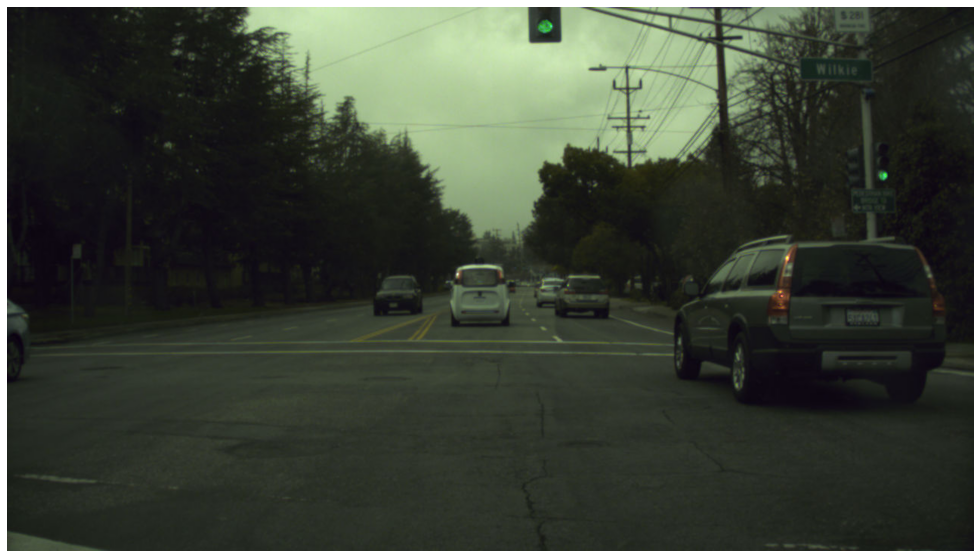

In [44]:
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

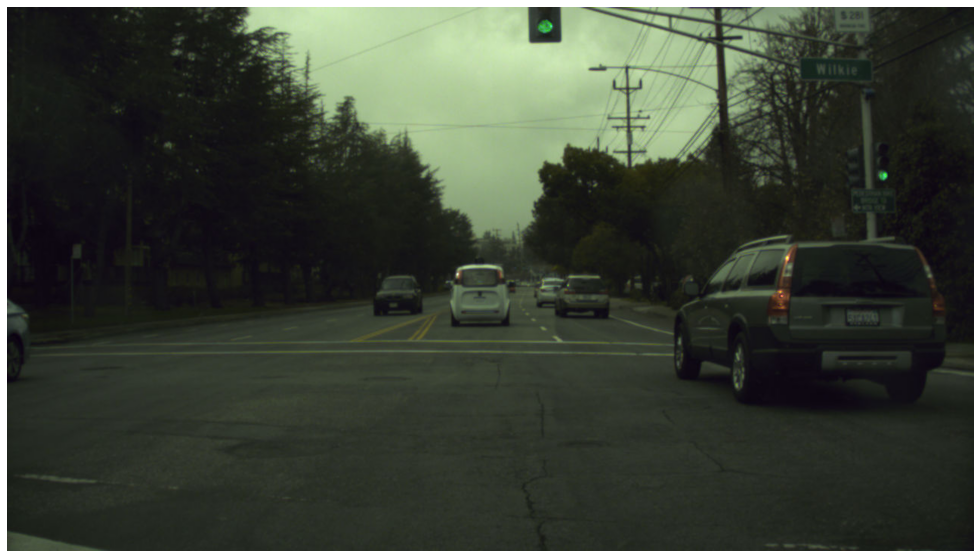

In [56]:
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_400.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/237868.png -thresh 0
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

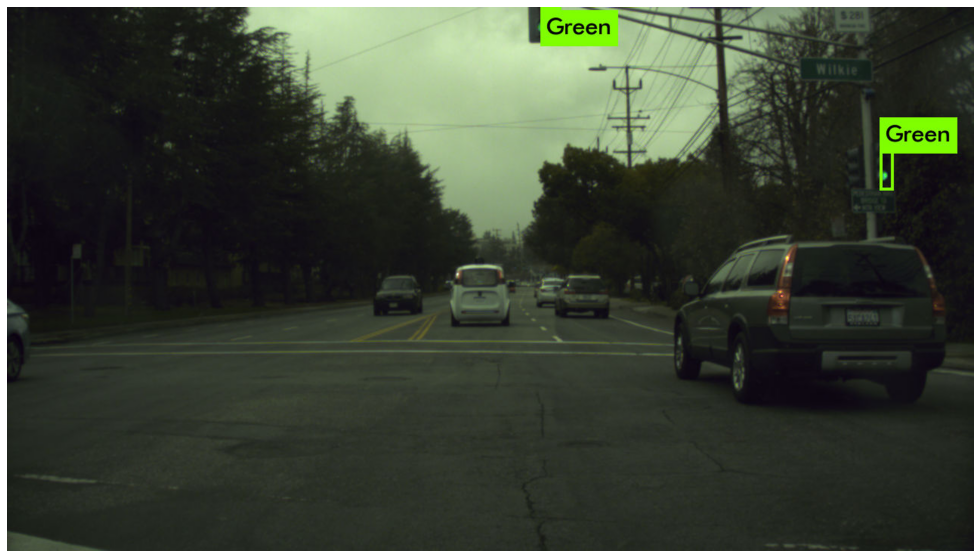

In [50]:
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_40000.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/237868.png -thresh 0.15
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

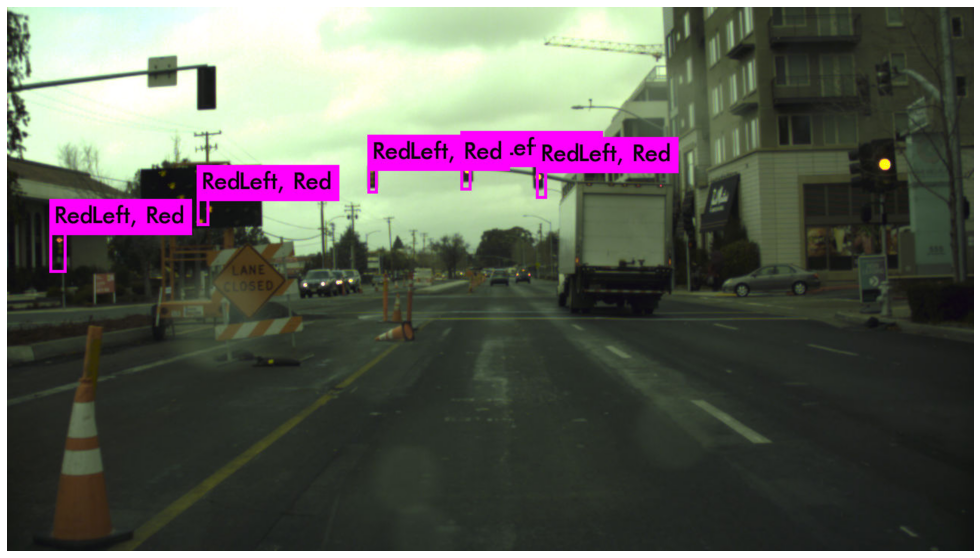

In [59]:
## misclassification - example
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_40000.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/219340.png -thresh 0.1
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

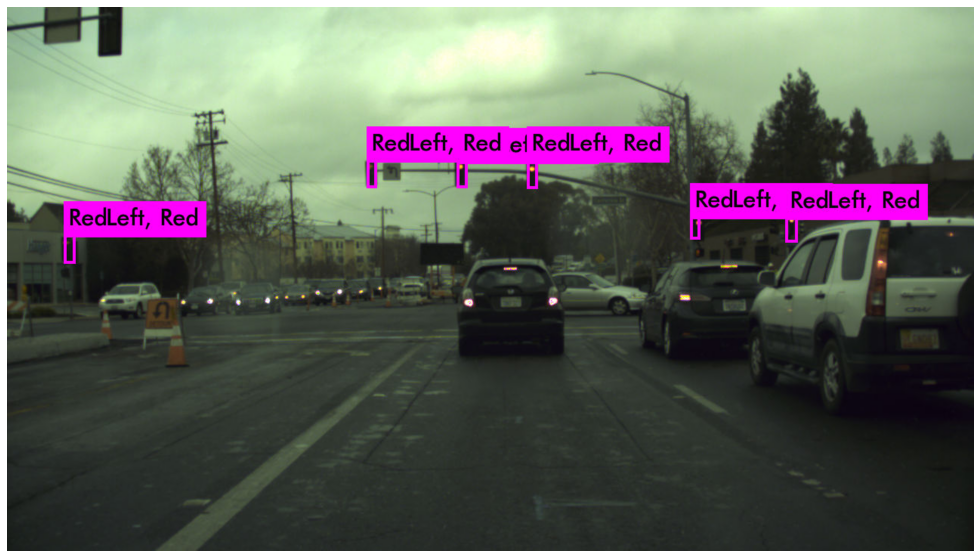

In [60]:
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_40000.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/223530.png -thresh 0.1
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

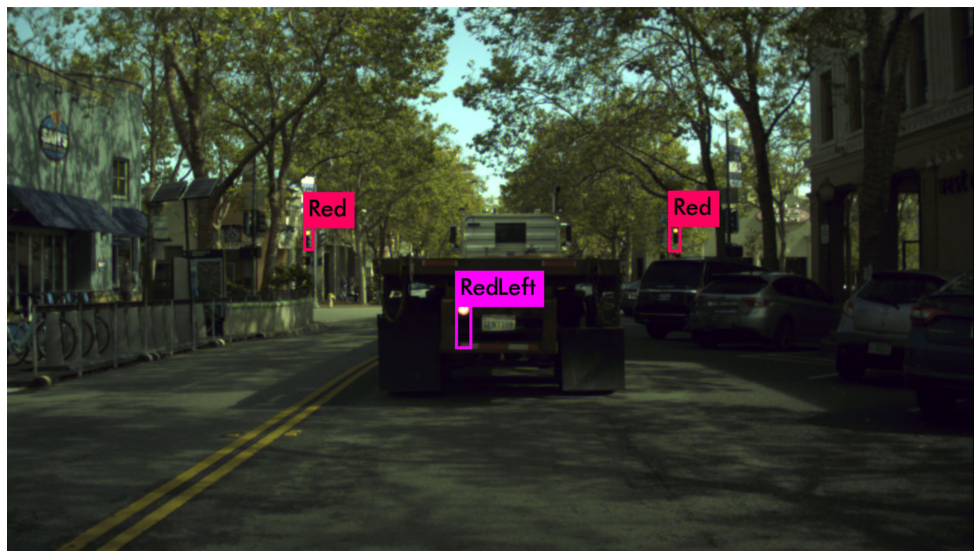

In [61]:
# misclassification another example - tail lights
! ./darknet detector test /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/traffic-lights/backup/yolov3-tiny-bosch_40000.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test/25656.png -thresh 0.1
imShow('predictions.jpg')

In [ ]:
# OpenCV comes preinstalled on Google colab.
# import cv2
# cv2.__version__

In [ ]:
# !wget https://pjreddie.com/media/files/yolov3-openimages.weights

In [ ]:
# Test YOLO on Open Images Dataset
!./darknet detector test cfg/openimages.data cfg/yolov3-openimages.cfg yolov3-openimages.weights /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/237868.png

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

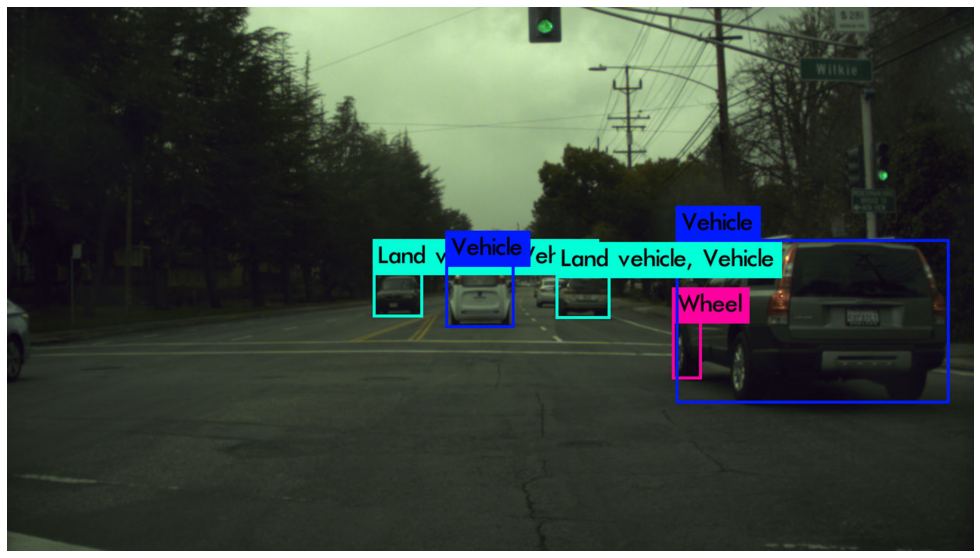

In [ ]:
imShow('predictions.jpg')

In [66]:
# !python /content/gdrive/MyDrive/TLD/traffic-lights/pascalvoc.py -gtformat xyrb